In [1]:
#代码首先导入了需要使用的模块：requests、lxml和csv。
import requests
from lxml import etree
import csv
 
#
doubanUrl = 'https://movie.douban.com/top250?start={}&filter='
 
 
# 然后定义了豆瓣电影TOP250页面的URL地址，并实现了一个函数getSource(url)来获取网页的源码。该函数发送HTTP请求，添加了请求头信息以防止被网站识别为爬虫，并通过requests.get()方法获取网页源码。
def getSource(url):
    # 反爬 填写headers请求头
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36'
    }
 
    response = requests.get(url, headers=headers)
    # 防止出现乱码
    response.encoding = 'utf-8'
    # print(response.text)
    return response.text
 
 
# 定义了一个函数getEveryItem(source)来解析每个电影的信息。首先，使用lxml库的etree模块将源码转换为HTML元素对象。然后，使用XPath表达式定位到包含电影信息的每个HTML元素。通过对每个元素进行XPath查询，提取出电影的标题、副标题、URL、评分和引言等信息。最后，将这些信息存储在一个字典中，并将所有电影的字典存储在一个列表中。
def getEveryItem(source):
    html_element = etree.HTML(source)
 
    movieItemList = html_element.xpath('//div[@class="info"]')
 
    # 定义一个空的列表
    movieList = []
 
    for eachMoive in movieItemList:
 
        # 创建一个字典 像列表中存储数据[{电影一},{电影二}......]
        movieDict = {}
 
        title = eachMoive.xpath('div[@class="hd"]/a/span[@class="title"]/text()')  # 标题
        otherTitle = eachMoive.xpath('div[@class="hd"]/a/span[@class="other"]/text()')  # 副标题
        link = eachMoive.xpath('div[@class="hd"]/a/@href')[0]  # url
        star = eachMoive.xpath('div[@class="bd"]/div[@class="star"]/span[@class="rating_num"]/text()')[0]  # 评分
        quote = eachMoive.xpath('div[@class="bd"]/p[@class="quote"]/span/text()')  # 引言（名句）
 
        if quote:
            quote = quote[0]
        else:
            quote = ''
        # 保存数据
        movieDict['title'] = ''.join(title + otherTitle)
        movieDict['url'] = link
        movieDict['star'] = star
        movieDict['quote'] = quote
 
        movieList.append(movieDict)
 
        print(movieList)
    return movieList
 
 
# 保存数据
def writeData(movieList):
    with open('douban.csv', 'w', encoding='utf-8', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=['title', 'star', 'quote', 'url'])
 
        writer.writeheader()  # 写入表头
 
        for each in movieList:
            writer.writerow(each)
 
 
if __name__ == '__main__':
    movieList = []
 
    # 一共有10页
 
    for i in range(10):
        pageLink = doubanUrl.format(i * 25)
 
        source = getSource(pageLink)
 
        movieList += getEveryItem(source)
 
    writeData(movieList)

[{'title': '肖申克的救赎\xa0/\xa0The Shawshank Redemption\xa0/\xa0月黑高飞(港)  /  刺激1995(台)', 'url': 'https://movie.douban.com/subject/1292052/', 'star': '9.7', 'quote': '希望让人自由。'}]
[{'title': '肖申克的救赎\xa0/\xa0The Shawshank Redemption\xa0/\xa0月黑高飞(港)  /  刺激1995(台)', 'url': 'https://movie.douban.com/subject/1292052/', 'star': '9.7', 'quote': '希望让人自由。'}, {'title': '霸王别姬\xa0/\xa0再见，我的妾  /  Farewell My Concubine', 'url': 'https://movie.douban.com/subject/1291546/', 'star': '9.6', 'quote': '风华绝代。'}]
[{'title': '肖申克的救赎\xa0/\xa0The Shawshank Redemption\xa0/\xa0月黑高飞(港)  /  刺激1995(台)', 'url': 'https://movie.douban.com/subject/1292052/', 'star': '9.7', 'quote': '希望让人自由。'}, {'title': '霸王别姬\xa0/\xa0再见，我的妾  /  Farewell My Concubine', 'url': 'https://movie.douban.com/subject/1291546/', 'star': '9.6', 'quote': '风华绝代。'}, {'title': '阿甘正传\xa0/\xa0Forrest Gump\xa0/\xa0福雷斯特·冈普', 'url': 'https://movie.douban.com/subject/1292720/', 'star': '9.5', 'quote': '一部美国近现代史。'}]
[{'title': '肖申克的救赎\xa0/\xa0The Shawshank Redempti

In [6]:
import pandas as pd
df1 = pd.read_csv('douban_top250.csv')
df2 = pd.read_csv('IMDB Top 250 Movies.csv')
avg_value_df1 = df1['rating_num'].mean()
avg_value_df2 = df2['rating'].mean()
print(f"average rating：{avg_value_df1} vs {avg_value_df2}")

average rating：8.942 vs 8.3072


In [7]:
import pandas as pd
df1 = pd.read_csv('douban_top250.csv')
df2 = pd.read_csv('IMDB Top 250 Movies.csv')
assert 'original_title' in df1.columns
assert 'name' in df2.columns
overlap = set(df1['original_title']) & set(df2['name'])
print(overlap)

{"Singin' in the Rain", 'Dead Poets Society', 'The Dark Knight Rises', 'Hacksaw Ridge', 'Toy Story 3', 'Hotel Rwanda', 'Up', '3 Idiots', 'The Silence of the Lambs', 'Pulp Fiction', 'Braveheart', 'Monsters, Inc.', 'Forrest Gump', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'How to Train Your Dragon', 'The Lord of the Rings: The Return of the King', 'Before Sunrise', '12 Angry Men', 'Once Upon a Time in America', 'Interstellar', 'The Lion King', 'The Godfather', 'A Beautiful Mind', 'Gone Girl', 'Joker', 'The Prestige', 'Harry Potter and the Deathly Hallows: Part 2', 'The Lord of the Rings: The Fellowship of the Ring', 'Whiplash', 'Django Unchained', "Schindler's List", '2001: A Space Odyssey', 'WALL·E', 'Gone with the Wind', 'Fight Club', 'The Matrix', 'Coco', 'Mary and Max', 'Memento', 'Modern Times', 'The Dark Knight', 'The Sound of Music', 'Shutter Island', 'Saving Private Ryan', 'Mad Max: Fury Road', 'The Pianist', "Hachi: A Dog's Tale", "One Flew Over the Cuckoo's Nest

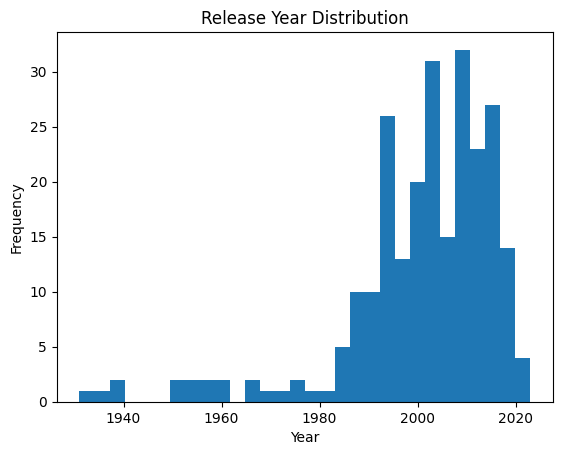

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# 读取数据
df = pd.read_csv('douban_top250.csv')
 
# 过滤掉缺失的发布年份
df = df[df['year'].notnull()]
 
# 绘制发布年份的直方图
df['year'].plot.hist(bins=30)
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

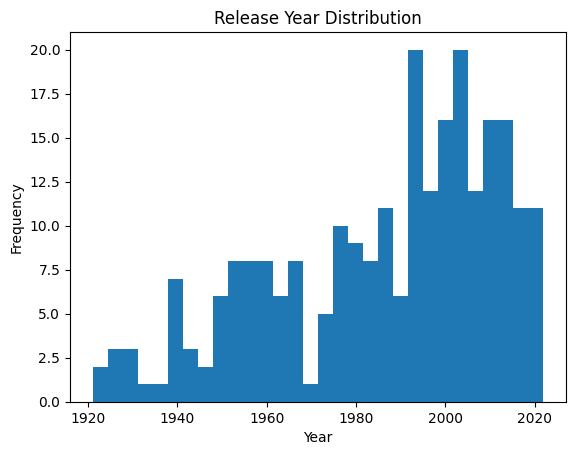

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# 读取数据
df = pd.read_csv('IMDB Top 250 Movies.csv')
 
# 过滤掉缺失的发布年份
df = df[df['year'].notnull()]
 
# 绘制发布年份的直方图
df['year'].plot.hist(bins=30)
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [11]:
import pandas as pd
df2 = pd.read_csv('IMDB Top 250 Movies.csv')
most_common_in_A = df['directors'].value_counts().index[0]
print(most_common_in_A)

Martin Scorsese
